In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
import seaborn as sns; sns.set_theme()
import scipy
from scipy import stats
from scipy.stats import norm
import math

In [2]:
# Specify the path to ChromeDriver
driver = webdriver.Chrome(executable_path='C:/Program Files (x86)/chromedriver.exe')

# Website
link = 'https://www.iban.com/currency-codes'

# Go to website
driver.get(link)

# Find the table using its XPath
table = driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div/div/table')

# Get the header row
header_row = table.find_element(By.TAG_NAME, 'thead').find_element(By.TAG_NAME, 'tr')

# Get the headers
headers = [col.text for col in header_row.find_elements(By.TAG_NAME, 'th')]

# Get the rest of the rows in the table
rows = table.find_element(By.TAG_NAME, 'tbody').find_elements(By.TAG_NAME, 'tr')

# Prepare an empty list to store the data
data = []

# Loop through each row
for row in rows:
    # Get the columns in each row
    cols = row.find_elements(By.TAG_NAME, 'td')

    # Prepare an empty list for this row
    row_data = []

    # Loop through each column
    for col in cols:
        # Add the column data to the row's list
        row_data.append(col.text)

    # Add the row's list to the main data list
    data.append(row_data)

# Close the driver
driver.quit()

# Create a DataFrame with the data
country_code_table = pd.DataFrame(data, columns=headers)

# Print the DataFrame
print(country_code_table)

C:\Users\final\AppData\Local\Temp\ipykernel_25580\671679858.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:/Program Files (x86)/chromedriver.exe')


            Country         Currency Code Number
0       AFGHANISTAN          Afghani  AFN    971
1           ALBANIA              Lek  ALL    008
2           ALGERIA   Algerian Dinar  DZD    012
3    AMERICAN SAMOA        US Dollar  USD    840
4           ANDORRA             Euro  EUR    978
..              ...              ...  ...    ...
264  WESTERN SAHARA  Moroccan Dirham  MAD    504
265           YEMEN      Yemeni Rial  YER    886
266          ZAMBIA   Zambian Kwacha  ZMW    967
267        ZIMBABWE  Zimbabwe Dollar  ZWL    932
268   ÅLAND ISLANDS             Euro  EUR    978

[269 rows x 4 columns]


In [3]:
def find_row_based_on_country(Country ='Country'):
    return country_code_table[country_code_table['Country']==Country]

In [4]:
find_row_based_on_country('CHINA')

,Country,Currency,Code,Number
47,CHINA,Yuan Renminbi,CNY,156


In [5]:
import requests

# Your Open Exchange Rates API key
api_key = '96c42bd5b8184d0ba2f55635f155c8cf'

# The Open Exchange Rates endpoint for latest rates
url = f'https://openexchangerates.org/api/latest.json?app_id={api_key}'

# Send a GET request to the API
response = requests.get(url)

# Convert the response to JSON
data = response.json()

# Convert the 'rates' part of the data to a DataFrame
df = pd.DataFrame(list(data['rates'].items()), columns=['Currency', 'Rate'])

# Add a 'Timestamp' column to the DataFrame
df['Timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Print the DataFrame
print(df)

    Currency        Rate           Timestamp
0        AED    3.673000 2023-08-14 06:00:00
1        AFN   84.566152 2023-08-14 06:00:00
2        ALL   94.907192 2023-08-14 06:00:00
3        AMD  389.872741 2023-08-14 06:00:00
4        ANG    1.811557 2023-08-14 06:00:00
..       ...         ...                 ...
164      XPT    0.001100 2023-08-14 06:00:00
165      YER  250.232000 2023-08-14 06:00:00
166      ZAR   19.025427 2023-08-14 06:00:00
167      ZMW   19.169139 2023-08-14 06:00:00
168      ZWL  322.000000 2023-08-14 06:00:00

[169 rows x 3 columns]


In [6]:
def calculate_cross_rate(df, currency1, currency2):
    # Get the rates for the two currencies
    rate1 = df.loc[df['Currency'] == currency1, 'Rate'].values[0]
    rate2 = df.loc[df['Currency'] == currency2, 'Rate'].values[0]

    # Calculate the cross rate
    cross_rate = rate2 / rate1

    return cross_rate

# Test the function
EURGBP = calculate_cross_rate(df, 'EUR', 'GBP')
print(f"The exchange rate from EUR to GBP is: {EURGBP}")

CNYGBP =calculate_cross_rate(df, 'CNY', 'GBP')
print(f"The exchange rate from CNY to GBP is: {CNYGBP}")

The exchange rate from EUR to GBP is: 0.8624812156714344
The exchange rate from CNY to GBP is: 0.10867047004836909


In [7]:
country_code_list = country_code_table['Code']
country_code_list

0      AFN
1      ALL
2      DZD
3      USD
4      EUR
      ... 
264    MAD
265    YER
266    ZMW
267    ZWL
268    EUR
Name: Code, Length: 269, dtype: object

In [10]:
df[df['Currency'] == 'SGD']

,Currency,Rate,Timestamp
127,SGD,1.354432,2023-08-14 06:00:00


In [12]:
calculate_cross_rate(df,'SGD','IDR')

11310.06496081014

In [96]:
def calculate_arbitrage_profit(usd_chf, eur_usd, market_eur_chf, initial_amount_usd):

    #short CHF and long EUR

    # Convert initial USD to CHF
    CHF = initial_amount_usd * usd_chf

    # Buy EUR with CHF at the market EUR/CHF rate
    EUR = CHF / market_eur_chf

    # Convert EUR back to USD at the EUR/USD rate
    end_amount_usd = EUR * eur_usd

    # Calculate the profit in USD
    profit = end_amount_usd - initial_amount_usd

    return profit

# Given exchange rates and initial USD amount
usd_chf = 1.25
eur_usd = 1.25
market_eur_chf = 1.55
initial_amount_usd = 100000

# Calculate the arbitrage profit
profit = calculate_arbitrage_profit(usd_chf, eur_usd, market_eur_chf, initial_amount_usd)

print(f"Profit (USD): {profit}")


Profit (USD): 806.4516129032127


In [27]:
import requests

# Set the base URL for the CoinGecko API
url = "https://api.coingecko.com/api/v3/simple/price"

# Define the parameters for the request
params = {
    "ids": "bitcoin,ethereum",
    "vs_currencies": "usd,eth"
}

# Make the request to the API
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Extract the BTC/USD, ETH/USD, and BTC/ETH prices from the response
    btc_usd = data['bitcoin']['usd']
    eth_usd = data['ethereum']['usd']
    btc_eth = data['bitcoin']['eth']

    print(f"BTC/USD: ${btc_usd}")
    print(f"ETH/USD: ${eth_usd}")
    print(f"BTC/ETH: {btc_eth} ETH")
else:
    print(f"Error: Unable to retrieve data from CoinGecko API (Status Code: {response.status_code})")


BTC/USD: $29385
ETH/USD: $1841.73
BTC/ETH: 15.955752 ETH


In [124]:
btc_usd = 29368.0
eth_usd = 1841.01
btc_eth = 15.95066

theoretical_rate = btc_usd / eth_usd
print(f'Current rate is {btc_eth}, which is lower than the {theoretical_rate}, therefore we will long btc and short eth')
#long BTC
#short eth

initial_amount_usdc = 1000
eth = initial_amount_usdc/eth_usd
btc = eth/btc_eth
final_amount_usdc = btc*btc_usd
final_amount_usdc
profit = final_amount_usdc - initial_amount_usdc
profit

Current rate is 15.95066, which is lower than the 15.952113242187712, therefore we will long btc and short eth


0.0911085928552211

In [107]:
btc_eth/rate

0.9999088997071642

In [59]:
def find_arbitrage_opportunity(btc_usd, eth_usd, btc_eth):
    rate = btc_usd / eth_usd
    print(f'Difference is {rate-btc_eth}')
    print(f'Current rate is {rate}')

    if rate > btc_eth:
        print(f"Arbitrage Opportunity Detected!")
        print("Trades to execute:")
        print("1. Sell BTC/ETH")
        #short BTC
        #long eth
        print("2. Sell ETH/USD")
        print("3. Long BTC/USD")
        #short eth, long USD
        #long btc, short USD

        initial_usd = 1000.0
        btc_amount = initial_usd / btc_usd
        eth_amount = btc_amount * btc_eth
        usd_end = eth_amount * eth_usd
        Potential_profit = usd_end - initial_usd # Subtract the initial 1000 USD
        print(f'Potential Profit: {Potential_profit} USD')
    else:
        print("No Arbitrage Opportunity Detected.")


# Example prices
btc_usd = 29368.0
eth_usd = 1841.01
btc_eth = 15.95066

# Find arbitrage opportunity
find_arbitrage_opportunity(btc_usd, eth_usd, btc_eth)

Difference is 0.001453242187713144
Current rate is 15.952113242187712
Arbitrage Opportunity Detected!
Trades to execute:
1. Sell BTC/ETH
2. Sell ETH/USD
3. Long BTC/USD
Potential Profit: -0.09110029283567656 USD


In [48]:
def find_arbitrage_opportunity(btc_usd, eth_usd, btc_eth):
    rate = btc_usd / eth_usd
    print(f'Difference is {rate-btc_eth}')
    print(f'Current rate is {rate}')

    if rate > btc_eth:
        print(f"Arbitrage Opportunity Detected!")
        print("Trades to execute:")
        print("1. Sell BTC/ETH")
        #short BTC
        #long eth
        print("2. Sell ETH/USD")
        print("3. Long BTC/USD")
        #short eth, long USD
        #long btc, short USD
        Potential_profit = -btc_eth -eth_usd +btc_usd
        print(Potential_profit)
    elif rate < btc_eth:
        print(f"Arbitrage Opportunity Detected!")
        print("Trades to execute:")
        print("1. Sell BTC/USD")
        print("2. Buy BTC/ETH")
        print("3. Buy ETH/USD")
    else:
        print("No Arbitrage Opportunity Detected")




Difference is 0.001453242187713144
Current rate is 15.952113242187712
Arbitrage Opportunity Detected!
Trades to execute:
1. Sell BTC/ETH
2. Sell ETH/USD
3. Long BTC/USD
27511.03934


In [46]:
eth_usd

1841.01

In [36]:
print('btc_eth',btc_eth)
print('btc_usd',btc_usd)
print('eth_usd',eth_usd)
# Initial amount of BTC
btc_start = 1.0

# Convert BTC to ETH
eth = btc_start / btc_eth
print(eth)

# Convert ETH to USD
usd = eth * eth_usd

# Convert USD back to BTC
btc_end = usd / btc_usd

btc_end-btc_start

btc_eth 15.955752
btc_usd 29385
eth_usd 1841.73
0.06267332307496382


-0.9960718958888258

1841.73

In [31]:
btc_eth

15.955752

In [32]:
btc_usd/eth_usd

15.95510742616996

In [71]:
import requests
import pandas as pd

# The World Bank API endpoint for countries
url = 'http://api.worldbank.org/v2/country?format=json'

# Send a GET request to the API
response = requests.get(url)

# Convert the response to JSON
data = response.json()

# The actual data is in the second item of the data list
data = data[1]

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Get the list of country codes
country_codes = df['iso2Code'].tolist()

# Print the list of country codes
print(country_codes)


['AW', 'ZH', 'AF', 'A9', 'ZI', 'AO', 'AL', 'AD', '1A', 'AE', 'AR', 'AM', 'AS', 'AG', 'AU', 'AT', 'AZ', 'BI', 'B4', 'B7', 'BE', 'BJ', 'BF', 'BD', 'BG', 'B1', 'BH', 'BS', 'BA', 'B2', 'BY', 'BZ', 'B3', 'BM', 'BO', 'BR', 'BB', 'BN', 'B6', 'BT', 'BW', 'C9', 'CF', 'CA', 'C4', 'B8', 'C5', 'CH', 'JG', 'CL']


In [25]:
prices_data = pd.DataFrame({
    'Asset1': [100, 101, 102, 103, 104],
    'Asset2': [50, 51, 52, 53, 54]
}, index=pd.date_range(start='2022-01-01', periods=5))
prices_data

,Asset1,Asset2
2022-01-01,100,50
2022-01-02,101,51
2022-01-03,102,52
2022-01-04,103,53
2022-01-05,104,54


In [28]:
class Backtester:
    def __init__(self, prices: pd.DataFrame, signals: pd.Series):
        """
        Initialize the Backtester with price data and signals.

        Parameters:
        - prices: A DataFrame with date as index and asset prices in columns.
        - signals: A Series with date as index and signals (e.g., 1 for Buy, -1 for Sell, 0 for Hold).
        """
        self.prices = prices
        self.signals = signals
        self.weights = self.compute_weights()
        self.returns = self.compute_returns()

    def compute_weights(self) -> pd.Series:
        """
        Compute weights based on signals.
        For simplicity, this example assumes:
        - Buy (signal=1) means weight=1
        - Sell (signal=-1) means weight=-1
        - Hold (signal=0) means weight=0
        """
        return self.signals

    def compute_returns(self) -> pd.Series:
        """
        Compute returns based on weights and price changes.
        """
        price_returns = self.prices.pct_change()
        strategy_returns = self.weights.shift(1) * price_returns
        return strategy_returns.sum(axis=1)

    def plot_returns(self):
        """
        Plot the cumulative returns of the strategy.
        """
        cumulative_returns = (1 + self.returns).cumprod()
        plt.plot(cumulative_returns)
        plt.title('Strategy Cumulative Returns')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Returns')
        plt.grid(True)
        plt.show()

In [34]:
#container to store ticker's Adj Close
price_data=pd.DataFrame()

#Ticker list
tickers=['INTC', 'JPM', 'AA', 'PG', 'MSFT']

#set time horizon
end=pd.Timestamp(2022,12,31)
start=pd.Timestamp(2014,1,1)

#pulling data
yf.pdr_override()
for t in tickers:
    adj_close=pdr.get_data_yahoo(t,start = start,end = end)["Adj Close"]
    price_data[f"{t}"] = adj_close

log_return=np.log(price_data/price_data.shift(1))
log_return=log_return.iloc[1:,:]
log_return

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,INTC,JPM,AA,PG,MSFT
Date,,,,,
2014-01-03,-0.000388,0.007701,0.003791,-0.001118,-0.006750
2014-01-06,-0.012490,0.005779,-0.003791,0.002359,-0.021359
2014-01-07,0.005093,-0.011592,0.000949,0.009626,0.007720
2014-01-08,-0.006272,0.009387,0.027142,-0.014599,-0.018014
2014-01-09,-0.004730,-0.001870,-0.013011,0.002241,-0.006453
...,...,...,...,...,...
2022-12-23,0.004610,0.004734,0.007950,0.002821,0.002265
2022-12-27,-0.005766,0.003498,0.014822,0.008677,-0.007442
2022-12-28,-0.015540,0.005450,-0.023913,-0.013011,-0.010308


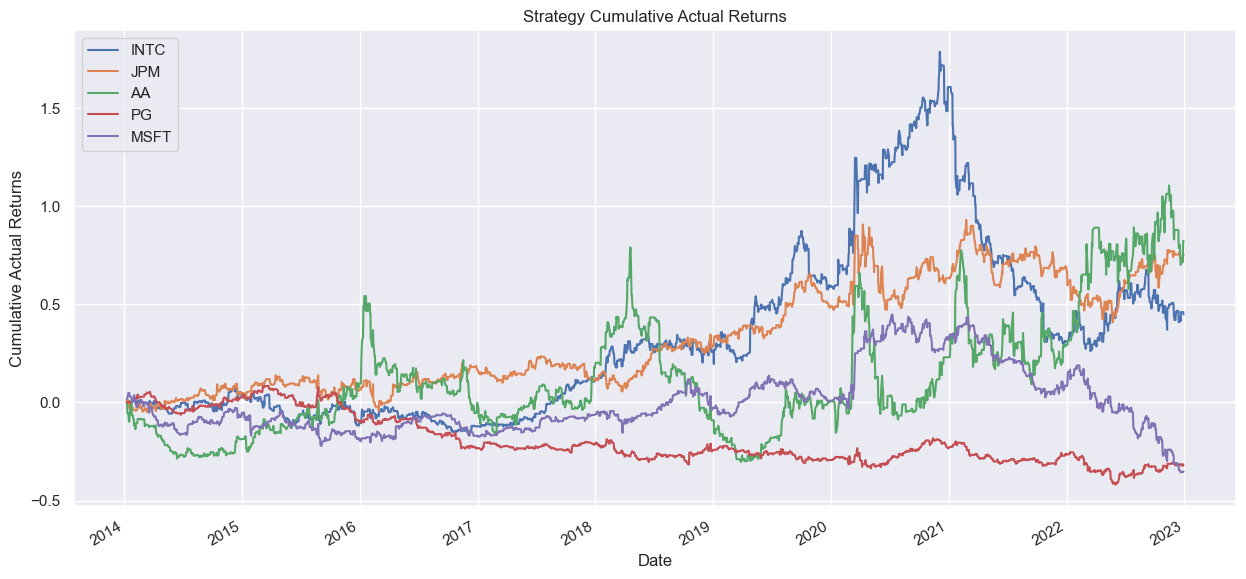

In [73]:
# Create a signals DataFrame
signals = pd.DataFrame(index=log_return.index, columns=log_return.columns)

for t in tickers:
    for i in range(2, len(log_return)):
        # Check the conditions for the signals
        """Rule: If the past 2 days are either consecutively positive or negative, we will either long or short. Else we will hold, which is 0"""
        if log_return[t].iloc[i-2] < 0 and log_return[t].iloc[i-1] < 0:
            signals[t].iloc[i] = -1
        elif log_return[t].iloc[i-2] > 0 and log_return[t].iloc[i-1] > 0:
            signals[t].iloc[i] = 1
        else:
            signals[t].iloc[i] = 0

# Calculate strategy's daily returns
strategy_returns = signals.shift(1) * log_return

cumulative_log_returns = strategy_returns.cumsum()

cumulative_actual_returns = cumulative_log_returns.applymap(np.exp) - 1

cumulative_actual_returns.plot(figsize=(15, 7))
plt.title('Strategy Cumulative Actual Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Actual Returns')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
